In [12]:
# IMPORTING NECESSERY LIBRARIES

In [13]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [15]:
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

In [128]:
from geopy import distance

# Importing Data

In [18]:
df = pd.read_csv("C:/Users/91883/Downloads/YourCabs.csv")
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [19]:
# NUMBER OF ROWS AND COLUMNS IN DATASET

df.shape

(43431, 18)

In [20]:
# NUMBER OF ROWS AND COLUMNS IN DATASET

df.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [21]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [22]:
data = df.drop(['Car_Cancellation'], axis=1)
target = df[['Car_Cancellation']]

In [23]:
# information about the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [24]:
data.isnull().mean()

id                     0.000000
user_id                0.000000
vehicle_model_id       0.000000
package_id             0.826161
travel_type_id         0.000000
from_area_id           0.002026
to_area_id             0.210403
from_city_id           0.623656
to_city_id             0.963436
from_date              0.000000
online_booking         0.000000
mobile_site_booking    0.000000
booking_created        0.000000
from_lat               0.002141
from_long              0.002141
to_lat                 0.210403
to_long                0.210403
dtype: float64

In [26]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id'],axis=1)

In [27]:
data.shape

(43431, 11)

In [28]:
data['vehicle_model_id'].value_counts(normalize=True)*100

#so as we can see 12 is covering for 73% of the entire column of vehicle_model_id

vehicle_model_id
12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: proportion, dtype: float64

In [29]:
data=data.drop(['vehicle_model_id'],axis=1) #Dropping as single value has more percentage

In [30]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720


In [31]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [32]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

In [33]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

In [34]:
data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [36]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [37]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
#Fill null with median for Continuous data and mode for Discrete data
#filling na values of to_lat with median of each group where the group is formed based on from_area_id

In [38]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))
#filling na values of to_long with median of each group where the group is formed based on from_area_id

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [40]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,02-10-2013 16:30,1,0,02-10-2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,03-04-2013 07:00,0,0,03-02-2013 17:48,12.968887,77.63575,NaN,NaN


In [41]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

from_area_id
1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: count, dtype: int64

In [42]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [ ]:
#encoding 

In [43]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [44]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [45]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [46]:
data.rename(columns={1:'long distance',2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [49]:
def cal_distance(from_lat,from_long,to_lat,to_long):
    return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [50]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [51]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [ ]:
#Extracting date and time from timestamp

In [53]:
data['from_date_dt'] = pd.to_datetime(data['from_date'], errors='coerce').dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date'], errors='coerce').dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created'], errors='coerce').dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created'], errors='coerce').dt.strftime('%H:%M')

In [56]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')


In [57]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

In [58]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

In [60]:
data['from_date'] = pd.to_datetime(data['from_date'], errors='coerce', format='%m/%d/%Y %H:%M')
data['booking_created'] = pd.to_datetime(data['booking_created'], errors='coerce', format='%m/%d/%Y %H:%M')

# Calculate time difference
data['time_diff'] = (data['from_date'] - data['booking_created']).dt.total_seconds() / 60

In [61]:
data[data['time_diff'] < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,booking_created_dt,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,2013-01-20 14:15:00,0,0,2013-01-20 15:01:00,False,True,8.482630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Weekday,0,0,-46.0
4228,571.0,2013-02-13 18:00:00,0,0,2013-02-13 18:29:00,False,True,5.866543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Weekday,0,0,-29.0
5303,1068.0,2013-02-23 18:00:00,0,0,2013-02-23 18:03:00,False,True,3.547502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Weekday,0,0,-3.0
6934,58.0,2013-03-13 16:00:00,1,0,2013-03-13 16:37:00,False,True,11.849498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Weekday,0,0,-37.0
7006,83.0,2013-03-14 12:30:00,0,0,2013-03-14 12:32:00,False,True,7.370831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Weekday,0,0,-2.0


In [62]:
data[data['time_diff'] < 0]['time_diff'].count()

29

In [63]:
data = data.drop(['from_date','booking_created'],axis=1)

In [64]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [65]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [66]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [67]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,True,False,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,NaN
1,Low Cancellation,0,0,True,False,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,NaN
2,Low Cancellation,0,0,True,False,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,NaN
3,Low Cancellation,0,0,True,False,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,NaN
4,Low Cancellation,0,0,True,False,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,NaN


In [ ]:
#Data Visualization -->

In [68]:
data.columns

Index(['from_area_id', 'online_booking', 'mobile_site_booking',
       'traveltype_pointtopoint', 'traveltype_hourly', 'distance',
       'from_date_day', 'booking_created_day', 'from_date_month',
       'booking_created_month', 'from_date_week', 'booking_created_week',
       'from_date_session', 'booking_created_session', 'time_diff'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   from_area_id             43431 non-null  object 
 1   online_booking           43431 non-null  int64  
 2   mobile_site_booking      43431 non-null  int64  
 3   traveltype_pointtopoint  43431 non-null  bool   
 4   traveltype_hourly        43431 non-null  bool   
 5   distance                 43431 non-null  float64
 6   from_date_day            17430 non-null  object 
 7   booking_created_day      17424 non-null  object 
 8   from_date_month          17430 non-null  object 
 9   booking_created_month    17424 non-null  object 
 10  from_date_week           43431 non-null  object 
 11  booking_created_week     43431 non-null  object 
 12  from_date_session        43431 non-null  object 
 13  booking_created_session  43431 non-null  object 
 14  time_diff             

In [70]:
data['online_booking'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='online_booking', ylabel='count'>

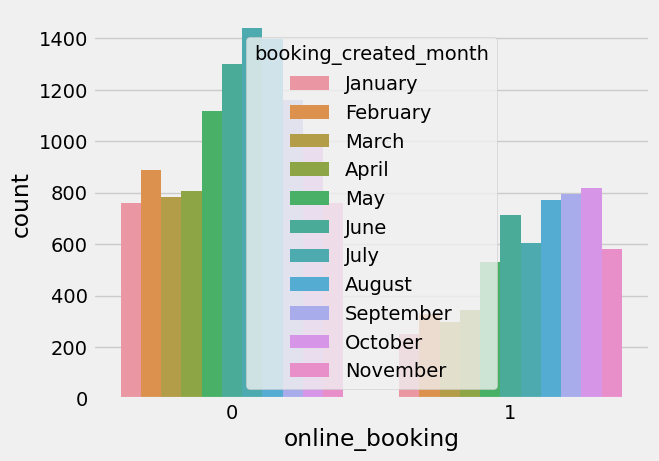

In [71]:
sns.countplot(hue='booking_created_month',x='online_booking',data=data)

<Axes: xlabel='booking_created_week', ylabel='count'>

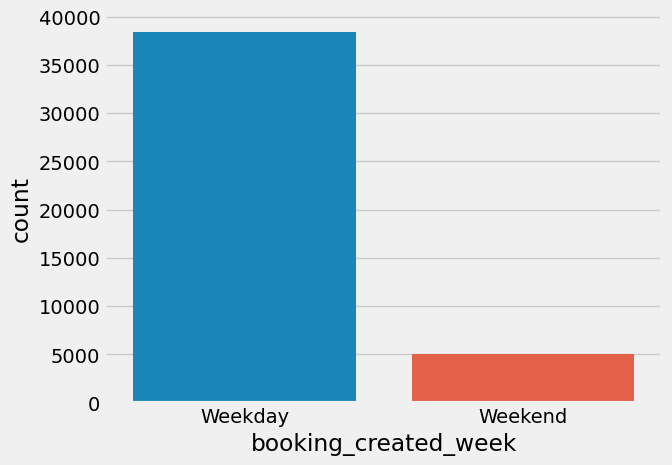

In [72]:
sns.countplot(x='booking_created_week',data=data)

<Axes: xlabel='traveltype_hourly', ylabel='count'>

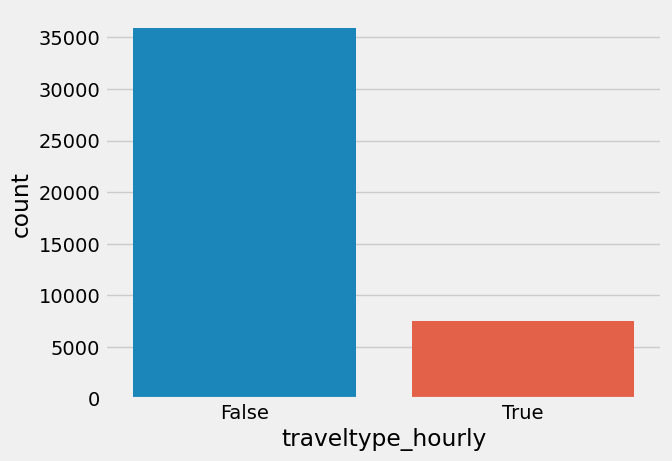

In [73]:
sns.countplot(x='traveltype_hourly',data=data)

<Axes: xlabel='booking_created_session', ylabel='count'>

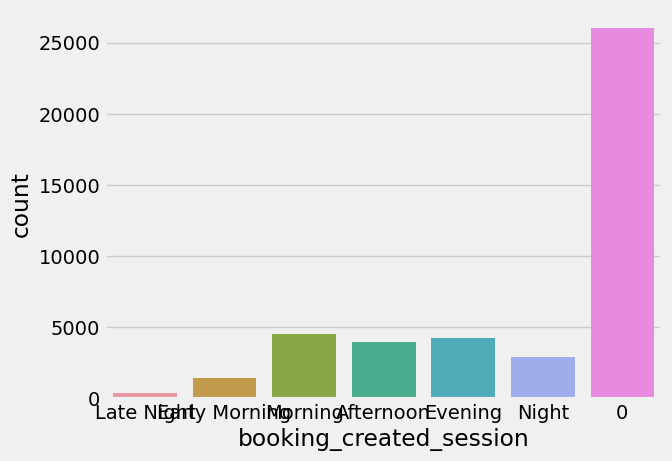

In [74]:
sns.countplot(x='booking_created_session',data=data)

<Axes: ylabel='Density'>

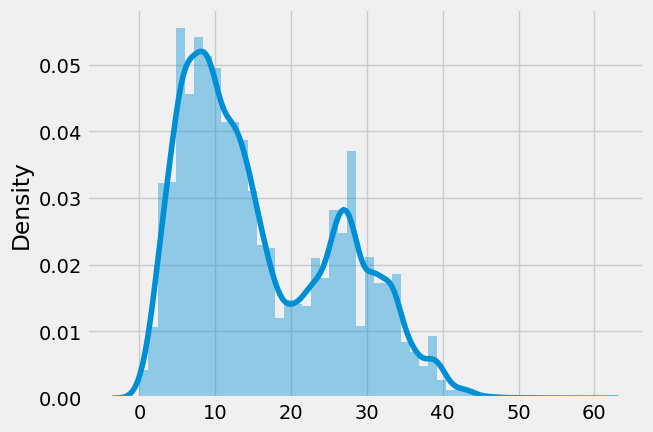

In [75]:
sns.distplot(x=data['distance'])

In [76]:
data['from_area_id'].value_counts()

from_area_id
Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: count, dtype: int64

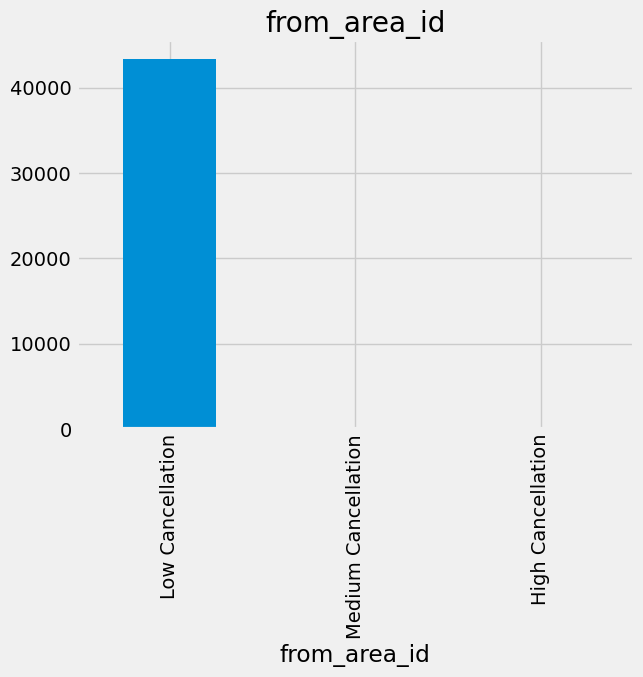

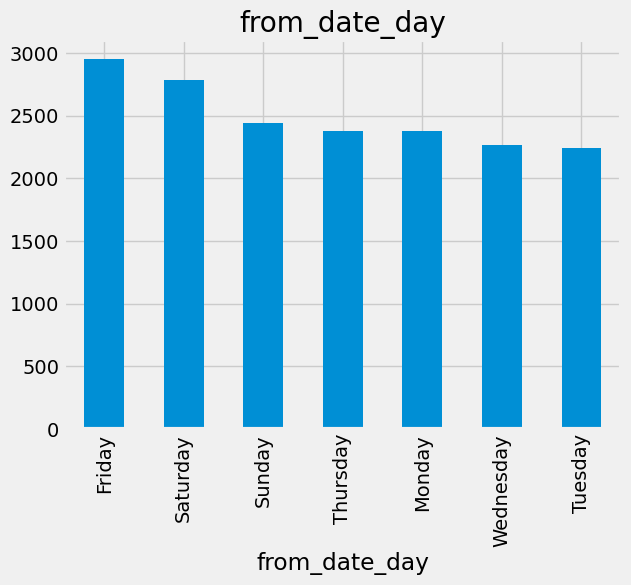

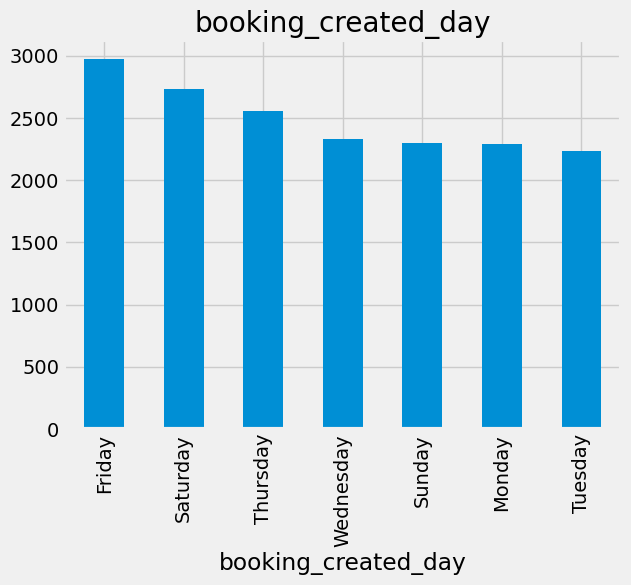

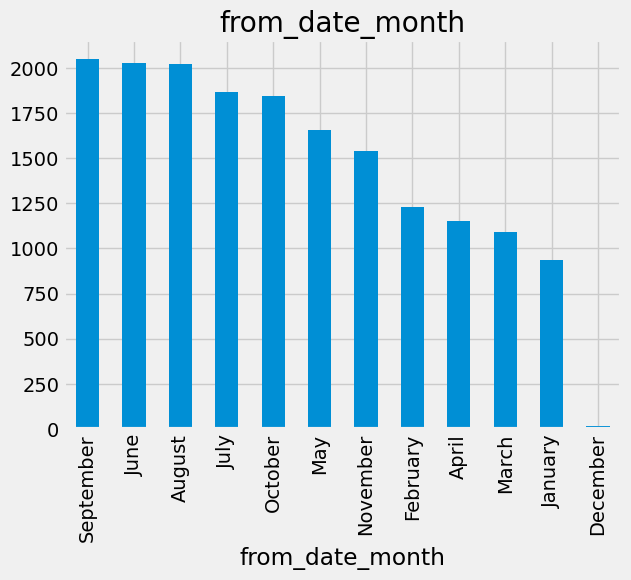

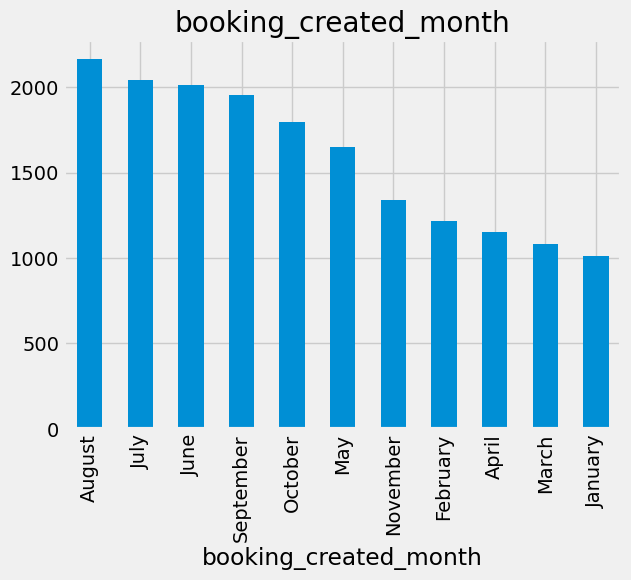

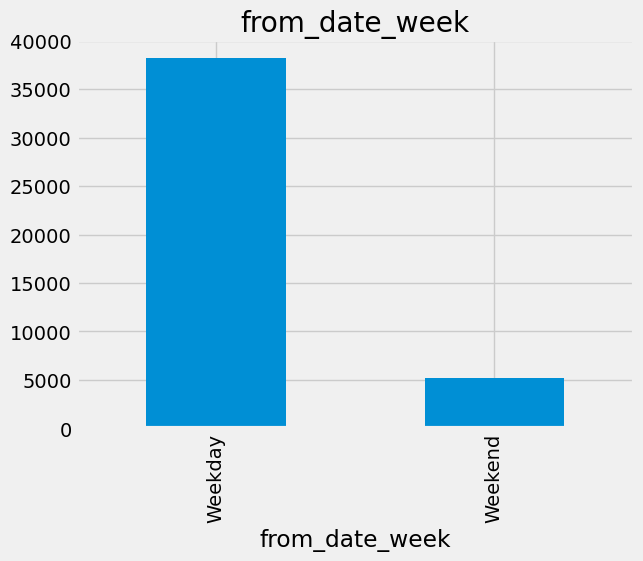

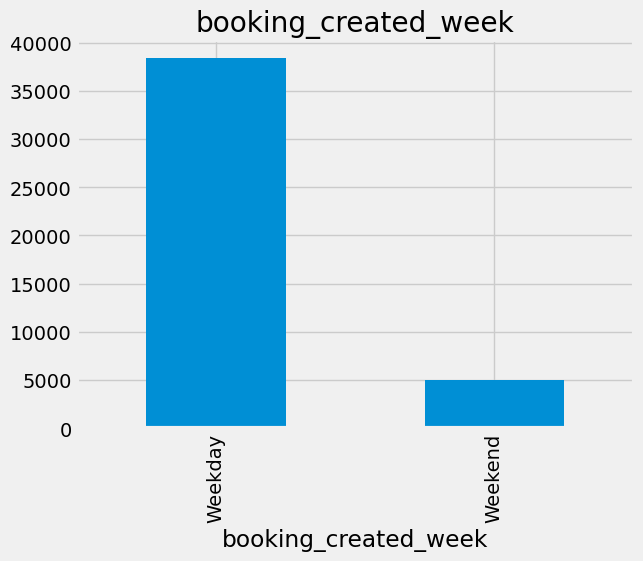

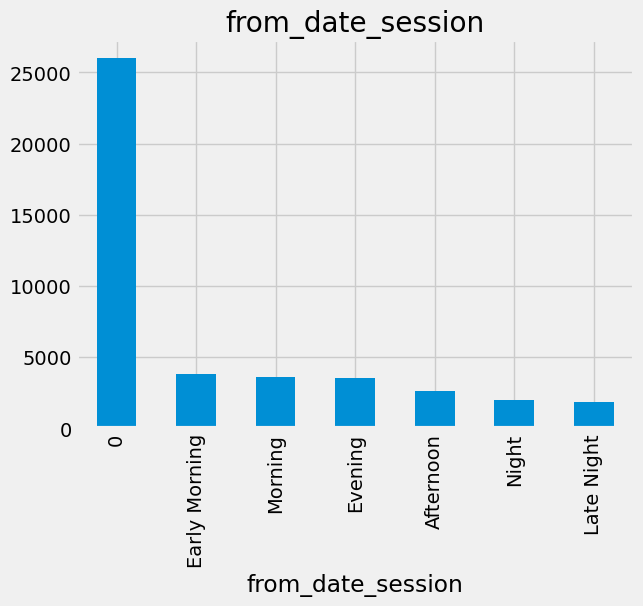

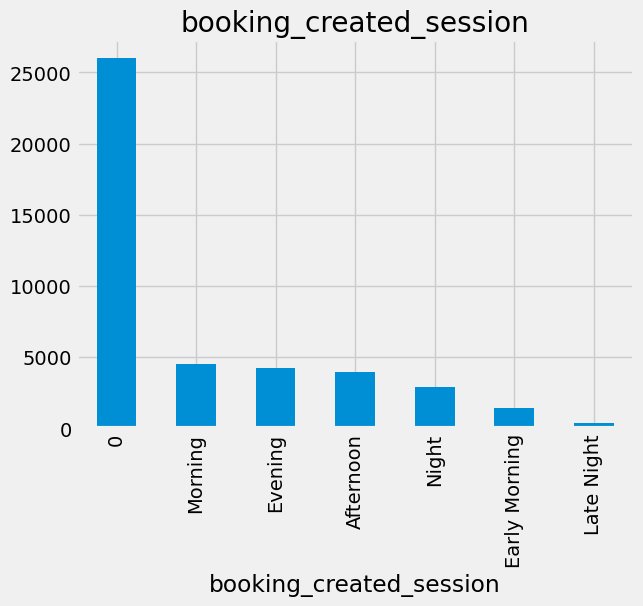

In [77]:
# visualisation about categorical data
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [ ]:
#Dividing data into Numerical and Categorical dataframes

In [78]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [79]:
num.head()

,online_booking,mobile_site_booking,distance,time_diff
0,0,0,3.980687,NaN
1,0,0,14.004432,NaN
2,0,0,12.648909,NaN
3,0,0,9.534596,NaN
4,0,0,14.655467,NaN


In [80]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


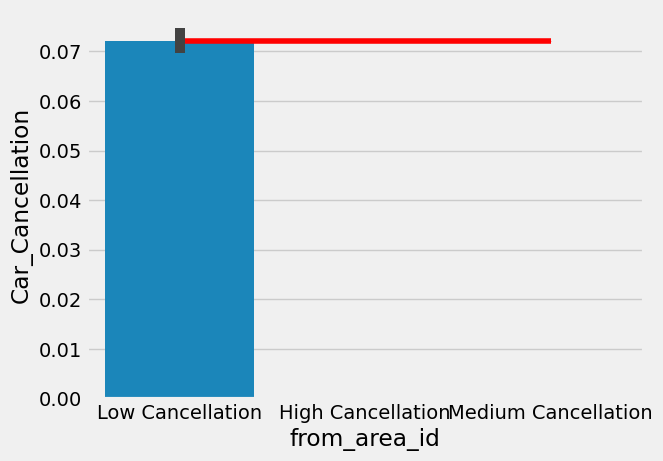

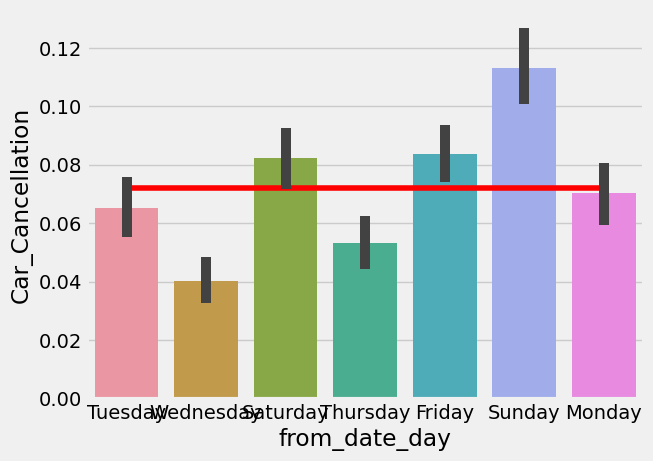

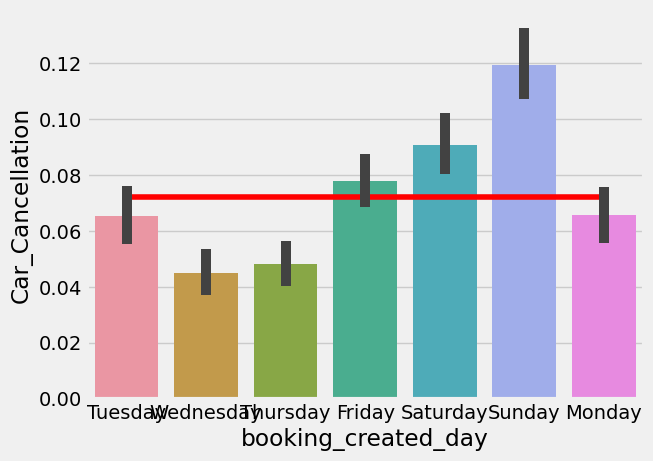

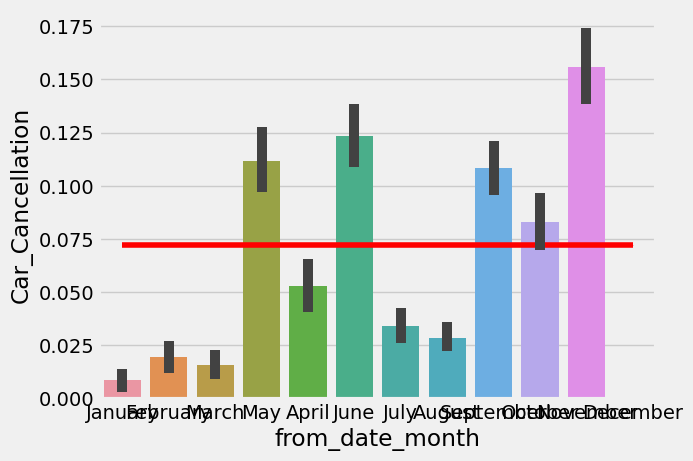

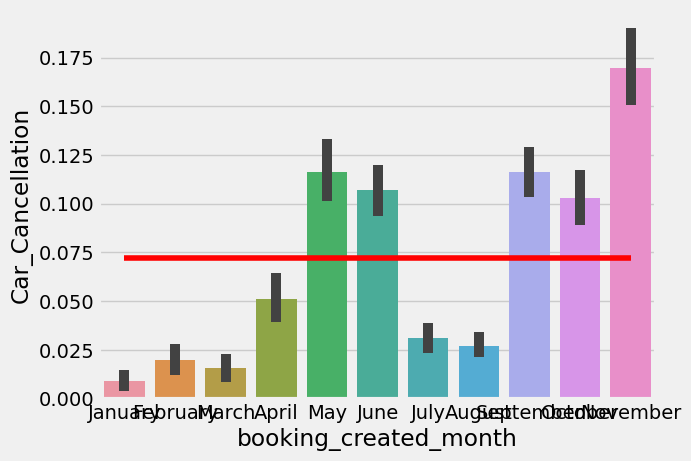

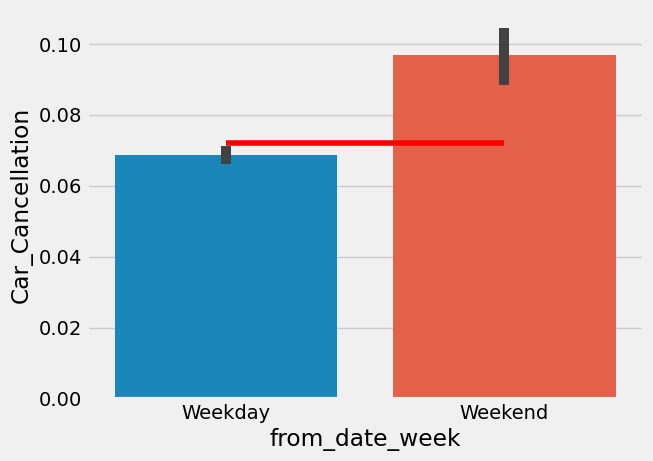

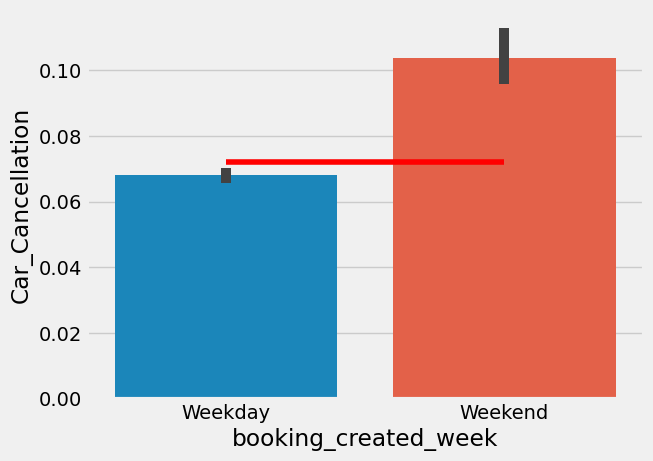

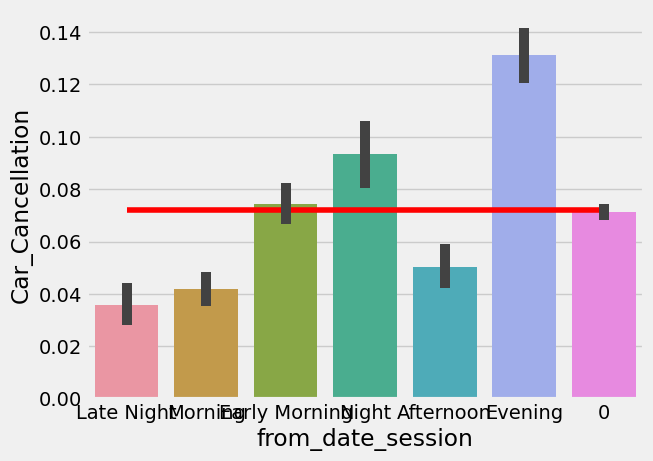

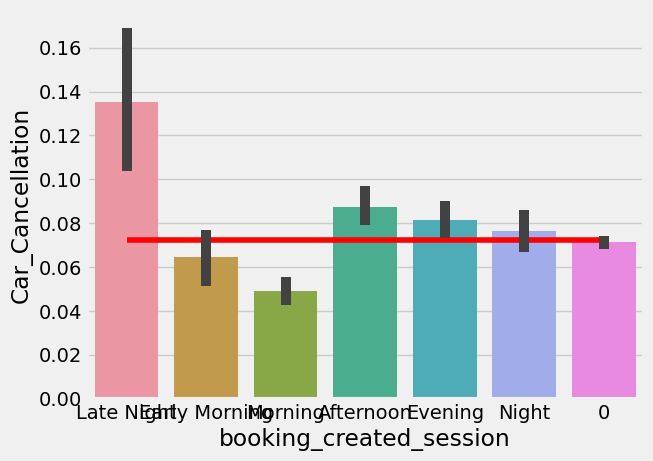

In [81]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()

In [ ]:
#Encoding Categorical variables

In [82]:
# encoding of Categorical variables
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(43431, 49)

In [83]:
X_char_dum.head()

,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,booking_created_day_Tuesday,booking_created_day_Wednesday,from_date_month_August,from_date_month_December,...,booking_created_month_October,booking_created_month_September,from_date_week_Weekend,booking_created_week_Weekend,from_date_session_Afternoon,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


In [84]:
data_all = pd.concat([num,X_char_dum],axis=1,join='inner')

In [85]:
data_all.head()

,online_booking,mobile_site_booking,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,...,booking_created_month_October,booking_created_month_September,from_date_week_Weekend,booking_created_week_Weekend,from_date_session_Afternoon,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,3.980687,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0,0,14.004432,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,0,0,12.648909,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,0,0,9.534596,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
4,0,0,14.655467,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False


In [86]:
data_all.shape

(43431, 53)

In [ ]:
#Train Test Split

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_all,target,test_size=0.2,random_state=0)

In [88]:
X_train.head()

,online_booking,mobile_site_booking,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,...,booking_created_month_October,booking_created_month_September,from_date_week_Weekend,booking_created_week_Weekend,from_date_session_Afternoon,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
30976,1,0,10.362671,NaN,True,False,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
40022,0,0,5.322934,36.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30078,0,0,3.564880,226.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
34586,1,0,14.511608,296.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
21362,0,0,15.856414,NaN,True,False,True,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False


In [89]:
X_test.head()

,online_booking,mobile_site_booking,distance,time_diff,from_area_id_Low Cancellation,from_area_id_Medium Cancellation,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,booking_created_day_Monday,booking_created_day_Saturday,booking_created_day_Sunday,booking_created_day_Thursday,...,booking_created_month_October,booking_created_month_September,from_date_week_Weekend,booking_created_week_Weekend,from_date_session_Afternoon,from_date_session_Early Morning,from_date_session_Evening,from_date_session_Late Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Afternoon,booking_created_session_Early Morning,booking_created_session_Evening,booking_created_session_Late Night,booking_created_session_Morning,booking_created_session_Night
3941,0,0,36.163930,NaN,True,False,False,False,True,False,False,False,False,False,True,False,...,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False
13692,0,1,5.679481,605.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26458,1,0,28.576256,NaN,True,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
5488,1,0,23.668118,1490.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33341,0,0,21.212056,6108.0,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Model Building

In [125]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Create an instance of HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(random_state=4)

# Train the model on imputed data
clf.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_imputed)


acc_clf = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of clf is : {acc_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of clf is : 0.9327731092436975
Confusion Matrix : 
[[8052   20]
 [ 564   51]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8072
           1       0.72      0.08      0.15       615

    accuracy                           0.93      8687
   macro avg       0.83      0.54      0.56      8687
weighted avg       0.92      0.93      0.91      8687



In [119]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9144698975480603
Confusion Matrix : 
[[7857  215]
 [ 528   87]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8072
           1       0.29      0.14      0.19       615

    accuracy                           0.91      8687
   macro avg       0.61      0.56      0.57      8687
weighted avg       0.89      0.91      0.90      8687



In [123]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9320824220098999
Confusion Matrix : 
[[8039   33]
 [ 557   58]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      8072
           1       0.64      0.09      0.16       615

    accuracy                           0.93      8687
   macro avg       0.79      0.55      0.56      8687
weighted avg       0.91      0.93      0.91      8687



In [124]:
models = pd.DataFrame({
    'Model' : ['HistGradient Boosting Classifier','Decision Tree Classifier','XgBoost'],
    'Score' : [acc_clf,  acc_dtc, acc_xgb]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,HistGradient Boosting Classifier,0.932888
2,XgBoost,0.932082
1,Decision Tree Classifier,0.914470
